In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits


In [2]:
file = '/Users/samquist/Downloads/hlsp_everest_k2_llc_220626248-c08_kepler_v2.0_lc.fits'

In [84]:
hdu = fits.open(file)

In [85]:
hdu.info()

Filename: /Users/samquist/Downloads/hlsp_everest_k2_llc_220626248-c08_kepler_v2.0_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  ARRAYS        1 BinTableHDU    316   3853R x 13C   [D, D, D, D, J, D, D, D, D, D, D, D, D]   
  2  PIXELS        1 BinTableHDU     19   3853R x 2C   [35D, 322D]   
  3  APERTURE MASK    1 ImageHDU        54   (10, 8)   int64   
  4  POSTAGE STAMPS    1 BinTableHDU     61   8R x 3C   [10D, 10D, 10D]   
  5  HI RES IMAGE    1 ImageHDU        54   (100, 80)   float64   


In [86]:
data = hdu[1].data

In [87]:
data.columns

ColDefs(
    name = 'CADN'; format = 'D'
    name = 'FLUX'; format = 'D'; unit = 'e-/s'
    name = 'FRAW'; format = 'D'; unit = 'e-/s'
    name = 'FRAW_ERR'; format = 'D'; unit = 'e-/s'
    name = 'QUALITY'; format = 'J'
    name = 'TIME'; format = 'D'; unit = 'BJD - 2454833'
    name = 'FCOR'; format = 'D'; unit = 'e-/s'
    name = 'CBV01'; format = 'D'
    name = 'CBV02'; format = 'D'
    name = 'CBV03'; format = 'D'
    name = 'CBV04'; format = 'D'
    name = 'CBV05'; format = 'D'
    name = 'CBV06'; format = 'D'
)

(7800, 7930)

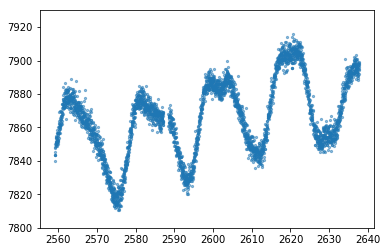

In [150]:
#plt.scatter(data['TIME'], data['FLUX'])
ok = np.where((data['QUALITY'] == 0) & (data['FCOR'] > 0))
plt.scatter(data['TIME'][ok], data['FCOR'][ok], s = 5, alpha = 0.5)
plt.ylim(7800,7930)

In [151]:
# data['QUALITY'] == 0

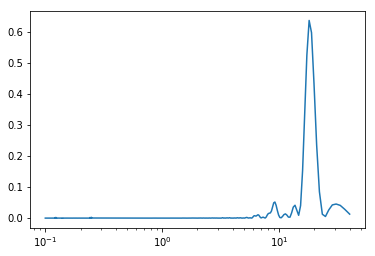

In [262]:
from astropy.stats import LombScargle
# hdu = fits.open(file)

# ok = np.where((data['QUALITY'] == 0) & (data['FCOR'] > 0))
#fcor = hdu[1].data.field('FCOR'[ok])
#time = hdu[1].data.field('TIME'[ok])
fcor = np.array(hdu[1].data.field('FCOR'),np.float)
time = np.array(hdu[1].data.field('TIME'),np.float)

LS = LombScargle(data['TIME'][ok], fcor[ok])
frequency, power = LS.autopower(minimum_frequency=1./40., maximum_frequency=1./0.1)
# yfit = LS.model(bestfreq)

# frequency, power = LombScargle(time[ok], fcor[ok]).autopower()
plt.plot(1/frequency, power)
plt.xscale('log')


(0, 1)

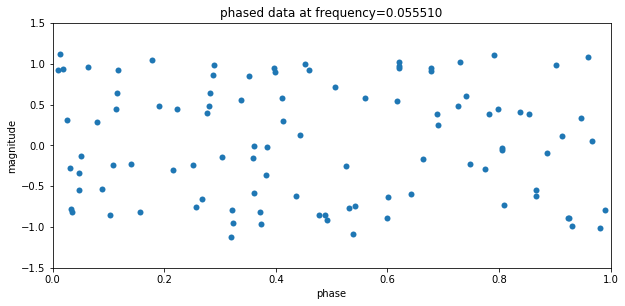

In [266]:

#t_fit = np.linspace(0, 1)
#y_fit = LombScargle(data['TIME'][ok], data['FCOR'][ok]).model(t_fit, best_freq)
#phase = (t_fit * best_freq) % 1
#plt.plot(t_fit, y_fit)

best_frequency = frequency[np.argmax(power)]
phase_fit = np.linspace(0, 1)
y_fit = LombScargle(data['TIME'][ok], data['FCOR'][ok]).model(t=phase_fit / best_frequency,
                                        frequency=best_frequency)
phase = (t * best_frequency) % 1

fig, ax = plt.subplots(figsize=(10, 4.5))
ax.errorbar(phase, y, fmt='o', mew=0, capsize=0, elinewidth=1.5)
ax.plot(phase_fit, y_fit, color='black')
ax.invert_yaxis()
ax.set(xlabel='phase',
    ylabel='magnitude',
    title='phased data at frequency={0:f}'.format(best_frequency))
plt.ylim(-1.5,1.5)
plt.xlim(0,1)
#I think this is the phased data. Im not really seeing a sine curve that would fit this unless the frequency is very high
    
    



In [177]:

def myfunc(hotdog):
    '''
    params
    hotdog: a float
    '''
    print(hotdog+1, pasta)
    return hotdog+2


In [178]:
hamburger = myfunc(1.5)
hamburger

NameError: name 'pasta' is not defined

In [176]:
hotdog

NameError: name 'hotdog' is not defined